# File and libraries

In [30]:
import pandas as pd
import numpy as np


filepath=r'data/df_gira_agg_2h_wtimevars_diff_input.csv'


file_tag = "Gira Bike"


# DSLabs functions

In [31]:
%run "scripts/dslabs_functions.py"


# Data functions

In [32]:
%run "scripts/data_functions.py"


data_functions lodaded


In [33]:
import pandas as pd

# Carregar o dataset
data = pd.read_csv(filepath, decimal=",", index_col='date', parse_dates=True, infer_datetime_format=True)

# Verificar os tipos de dados antes da conversão
display(data.dtypes)

# Forçar a conversão para o tipo numérico para todas as colunas que devem ser numéricas
# Selecionando todas as colunas, exceto o índice (que é de data)
numeric_columns = data.columns.difference(['date'])

# Tentar converter as colunas numéricas
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

test_split_threshold=0.9
target = 'target_station_load_rate' 

# Verifique o tipo das colunas após a conversão
print("\nTipos de dados após a conversão:")
display(data.dtypes)

# Exibir as últimas linhas para confirmar que os dados estão corretos
display(data.tail())

display(data.index.min())
display(data.index.max())
display(data.shape)


temperature_2m                                                 object
rain_mm                                                        object
wmo_weather_code                                               object
wind_speed_10m                                                 object
is_holiday_lisbon                                              object
is_weekend                                                     object
day_of_week_sin                                                object
day_of_week_cos                                                object
time_of_day_sin                                                object
time_of_day_cos                                                object
target_station_status                                          object
target_station_load_rate                                       object
station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima       object
station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia       object
station_load_rate_ P


Tipos de dados após a conversão:


temperature_2m                                                 float64
rain_mm                                                        float64
wmo_weather_code                                               float64
wind_speed_10m                                                 float64
is_holiday_lisbon                                              float64
is_weekend                                                     float64
day_of_week_sin                                                float64
day_of_week_cos                                                float64
time_of_day_sin                                                float64
time_of_day_cos                                                float64
target_station_status                                          float64
target_station_load_rate                                       float64
station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima       float64
station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia       float64
statio

,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,is_holiday_lisbon,is_weekend,day_of_week_sin,day_of_week_cos,time_of_day_sin,time_of_day_cos,target_station_status,target_station_load_rate,station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima,station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia,station_load_rate_ Praça de Londres,station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego,station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego
date,,,,,,,,,,,,,,,,,
2023-03-31 14:00:00,0.114501,0.0,0.0,-0.320973,0.0,0.0,0.0,0.0,0.000000,0.000000,-18.155176,0.283739,0.188109,0.437896,0.354674,0.342591,0.146526
2023-03-31 16:00:00,-0.209918,0.0,0.0,-0.144438,0.0,0.0,0.0,0.0,0.000000,0.000000,18.155176,0.052694,-0.673013,-0.077037,0.039014,-0.249602,-0.188390
2023-03-31 18:00:00,-0.400753,0.0,0.0,-0.738238,0.0,0.0,0.0,0.0,0.597814,-1.621767,0.000000,-0.636385,-0.760798,1.090686,0.315660,-0.851584,0.450043
2023-03-31 20:00:00,-0.438920,0.0,0.0,-0.593801,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.539103,0.836041,-0.616298,-0.929247,-0.141931,0.371547
2023-03-31 22:00:00,-0.248085,0.0,0.0,-0.064195,0.0,0.0,0.0,0.0,0.896720,2.919180,0.000000,1.098474,-0.196470,0.000000,0.574572,-0.391533,0.151759


Timestamp('2022-01-01 14:00:00')

Timestamp('2023-03-31 22:00:00')

(5420, 17)

# Smoothing
- First differentiation removes trends (e.g., converts increasing values into stationary changes).
- Second differentiation removes linear trends (useful if first differentiation still shows patterns).
- Third differentiation is rare but can be used for very strong trends

## Smoothing 0 (no transformation)

### df_0 - Creating series for original df with time +target variable

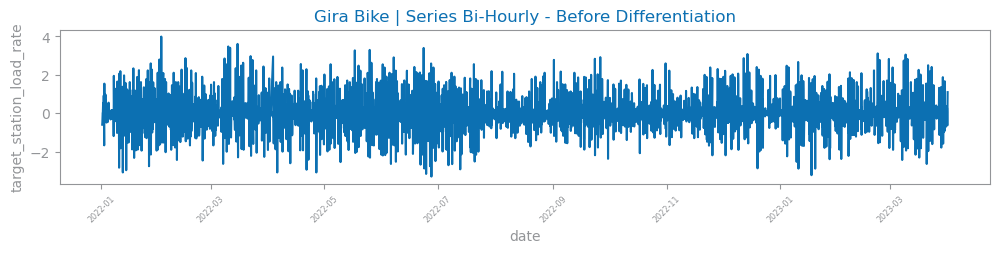

In [34]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT

target = 'target_station_load_rate' 

data_0 = data.copy()

df_0: DataFrame = data_0
#series - series of original df with no transformation
series: Series = df_0[target]

figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} | Series Bi-Hourly - Before Differentiation",
)
show()

In [35]:
display(df_0.head())
display(series.head())

,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,is_holiday_lisbon,is_weekend,day_of_week_sin,day_of_week_cos,time_of_day_sin,time_of_day_cos,target_station_status,target_station_load_rate,station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima,station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia,station_load_rate_ Praça de Londres,station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego,station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego
date,,,,,,,,,,,,,,,,,
2022-01-01 14:00:00,0.229002,0.0,0.000000,0.048146,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,-0.595851,-0.597770,-0.413569,0.283739,0.034259,-0.177924
2022-01-01 16:00:00,-0.362586,0.0,-0.059009,0.064195,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,-0.486409,0.673013,-1.159614,-0.865405,-0.425792,-0.303518
2022-01-01 18:00:00,-0.534338,0.0,0.059009,0.224681,0.0,0.0,0.0,0.0,0.597814,-1.621767,0.0,-0.162136,-0.434742,0.689281,-1.014369,-0.210449,0.130827
2022-01-01 20:00:00,-0.019083,0.0,0.000000,0.192584,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.058523,0.417623,0.443343,0.743912,0.000000
2022-01-01 22:00:00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.896720,2.919180,0.0,0.000000,0.497445,-0.085147,0.088669,0.156613,0.172691


date
2022-01-01 14:00:00   -0.595851
2022-01-01 16:00:00   -0.486409
2022-01-01 18:00:00   -0.162136
2022-01-01 20:00:00    0.000000
2022-01-01 22:00:00    0.000000
Name: target_station_load_rate, dtype: float64

### Evaluate

In [36]:
from pandas import Series, DataFrame

def series_train_test_split(data, trn_pct: float = 0.90):
    trn_size: int = int(len(data) * trn_pct)
    df_cp = data.copy()

    if isinstance(df_cp, Series):
        train: Series = df_cp.iloc[:trn_size]
        test: Series = df_cp.iloc[trn_size:]
    elif isinstance(df_cp, DataFrame):
        train: DataFrame = df_cp.iloc[:trn_size]
        test: DataFrame = df_cp.iloc[trn_size:]
    else:
        raise TypeError("Input must be a Series or DataFrame.")

    return train, test

def dataframe_temporal_train_test_split(data: DataFrame, trn_pct: float = 0.90) -> tuple[DataFrame, DataFrame]:
    trn_size: int = int(len(data) * trn_pct)
    df_cp: DataFrame = data.copy()
    train: DataFrame = df_cp.iloc[:trn_size]
    test: DataFrame = df_cp.iloc[trn_size:]
    return train, test

In [37]:
from math import sqrt
from matplotlib.pyplot import subplots
from pandas import Series

def plot_forecasting_eval(trn: Series, tst: Series, prd_trn: Series, prd_tst: Series, title: str = "") -> list:
    # Calculate evaluation metrics
    ev1: dict = {
        "RMSE": [sqrt(FORECAST_MEASURES["MSE"](trn, prd_trn)), sqrt(FORECAST_MEASURES["MSE"](tst, prd_tst))],
        "MAE": [FORECAST_MEASURES["MAE"](trn, prd_trn), FORECAST_MEASURES["MAE"](tst, prd_tst)],
    }
    ev2: dict = {
        "MAPE": [FORECAST_MEASURES["MAPE"](trn, prd_trn), FORECAST_MEASURES["MAPE"](tst, prd_tst)],
        "R2": [FORECAST_MEASURES["R2"](trn, prd_trn), FORECAST_MEASURES["R2"](tst, prd_tst)],
    }

    # Print metric values and sizes of train and test sets
    print(f"\n### Forecasting Evaluation Metrics ({title}) ###")
    print(f"Train size: {len(trn)}")
    print(f"Test size: {len(tst)}")
    print(f"RMSE - Train: {ev1['RMSE'][0]:.4f}, Test: {ev1['RMSE'][1]:.4f}")
    print(f"MAE - Train: {ev1['MAE'][0]:.4f}, Test: {ev1['MAE'][1]:.4f}")
    print(f"MAPE - Train: {ev2['MAPE'][0]:.4f}, Test: {ev2['MAPE'][1]:.4f}")
    print(f"R2 - Train: {ev2['R2'][0]:.4f}, Test: {ev2['R2'][1]:.4f}\n")

    # Plot the metrics
    HEIGHT = 6
    fig, axs = subplots(1, 2, figsize=(1.5 * HEIGHT, 0.75 * HEIGHT), squeeze=True)
    fig.suptitle(title)
    plot_multibar_chart(["train", "test"], ev1, ax=axs[0], title="Scale-dependent error", percentage=False)
    plot_multibar_chart(["train", "test"], ev2, ax=axs[1], title="Percentage error", percentage=True)

    return axs

In [38]:
test_split_threshold=0.9


### Forecasting Evaluation Metrics (Gira Bike | Linear Regression Evaliation - No Smoothing) ###
Train size: 4878
Test size: 542
RMSE - Train: 0.7283, Test: 0.7414
MAE - Train: 0.4354, Test: 0.4389
MAPE - Train: 61527624497.4344, Test: 105766843869.9268
R2 - Train: 0.0000, Test: -0.0000



array([<Axes: title={'center': 'Scale-dependent error'}>,
       <Axes: title={'center': 'Percentage error'}>], dtype=object)

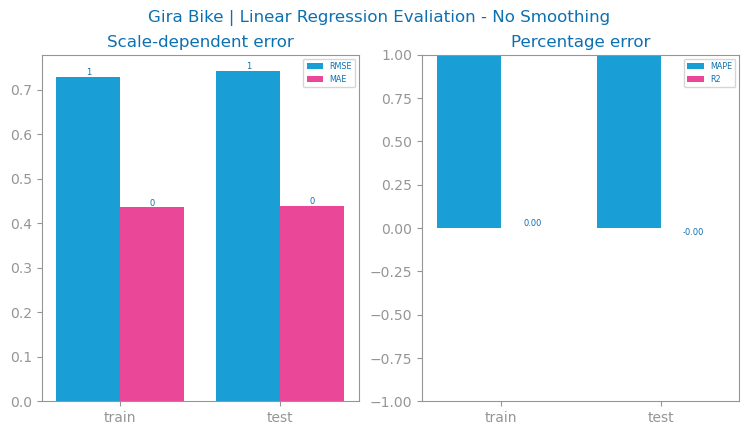

In [39]:
from sklearn.linear_model import LinearRegression
from matplotlib.pyplot import savefig
import pandas as pd
from numpy import arange


series = series.sort_index()

train_0, test_0 = series_train_test_split(series, trn_pct=test_split_threshold)

trnX_0 = arange(len(train_0)).reshape(-1, 1)
trnY_0 = train_0.to_numpy()
tstX_0 = arange(len(train_0), len(series)).reshape(-1, 1)
tstY_0 = test_0.to_numpy()

model = LinearRegression()
model.fit(trnX_0, trnY_0)

prd_trn_0: Series = Series(model.predict(trnX_0), index=train_0.index)
prd_tst_0: Series = Series(model.predict(tstX_0), index=test_0.index)

plot_forecasting_eval(train_0, test_0, prd_trn_0, prd_tst_0, title=f"{file_tag} | Linear Regression Evaliation - No Smoothing")

### Linear Regression Plot

<Axes: xlabel='date', ylabel='target_station_load_rate'>

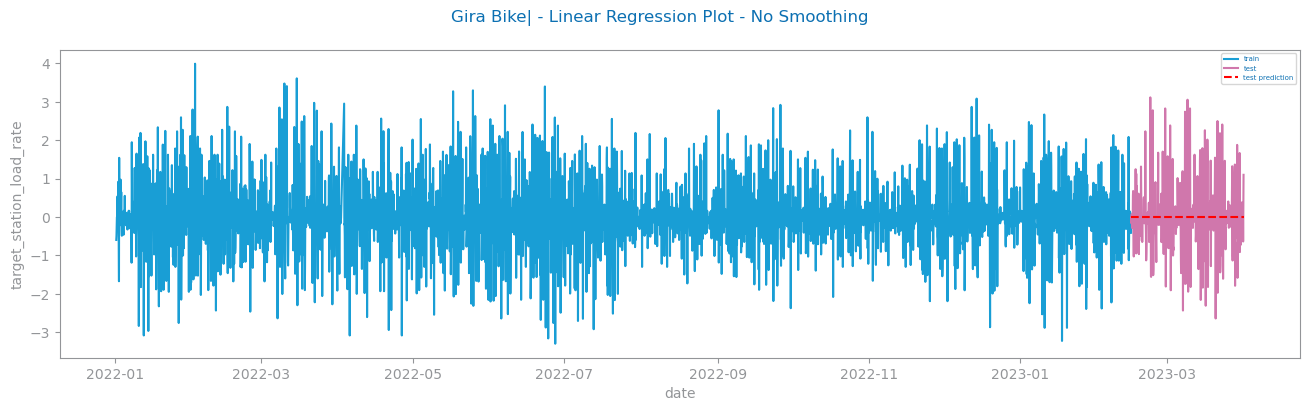

In [40]:
plot_forecasting_series(
    train_0,
    test_0,
    prd_tst_0,
    title=f"{file_tag}| - Linear Regression Plot - No Smoothing",
    xlabel="date",
    ylabel=target,
)

## Smothing Treat 1 

### Strategy Application

In [27]:
series.head()

date
2022-01-01 14:00:00   -0.595851
2022-01-01 16:00:00   -0.486409
2022-01-01 18:00:00   -0.162136
2022-01-01 20:00:00    0.000000
2022-01-01 22:00:00    0.000000
Name: target_station_load_rate, dtype: float64

In [72]:
series.head()

date
2022-01-01 14:00:00   -0.595851
2022-01-01 16:00:00   -0.486409
2022-01-01 18:00:00   -0.162136
2022-01-01 20:00:00    0.000000
2022-01-01 22:00:00    0.000000
Name: target_station_load_rate, dtype: float64

In [71]:
ss_smooth.head()

date
2022-01-07 18:00:00   -0.018754
2022-01-07 20:00:00    0.015133
2022-01-07 22:00:00    0.033508
2022-01-08 00:00:00    0.035670
2022-01-08 02:00:00    0.041075
Name: target_station_load_rate, dtype: float64

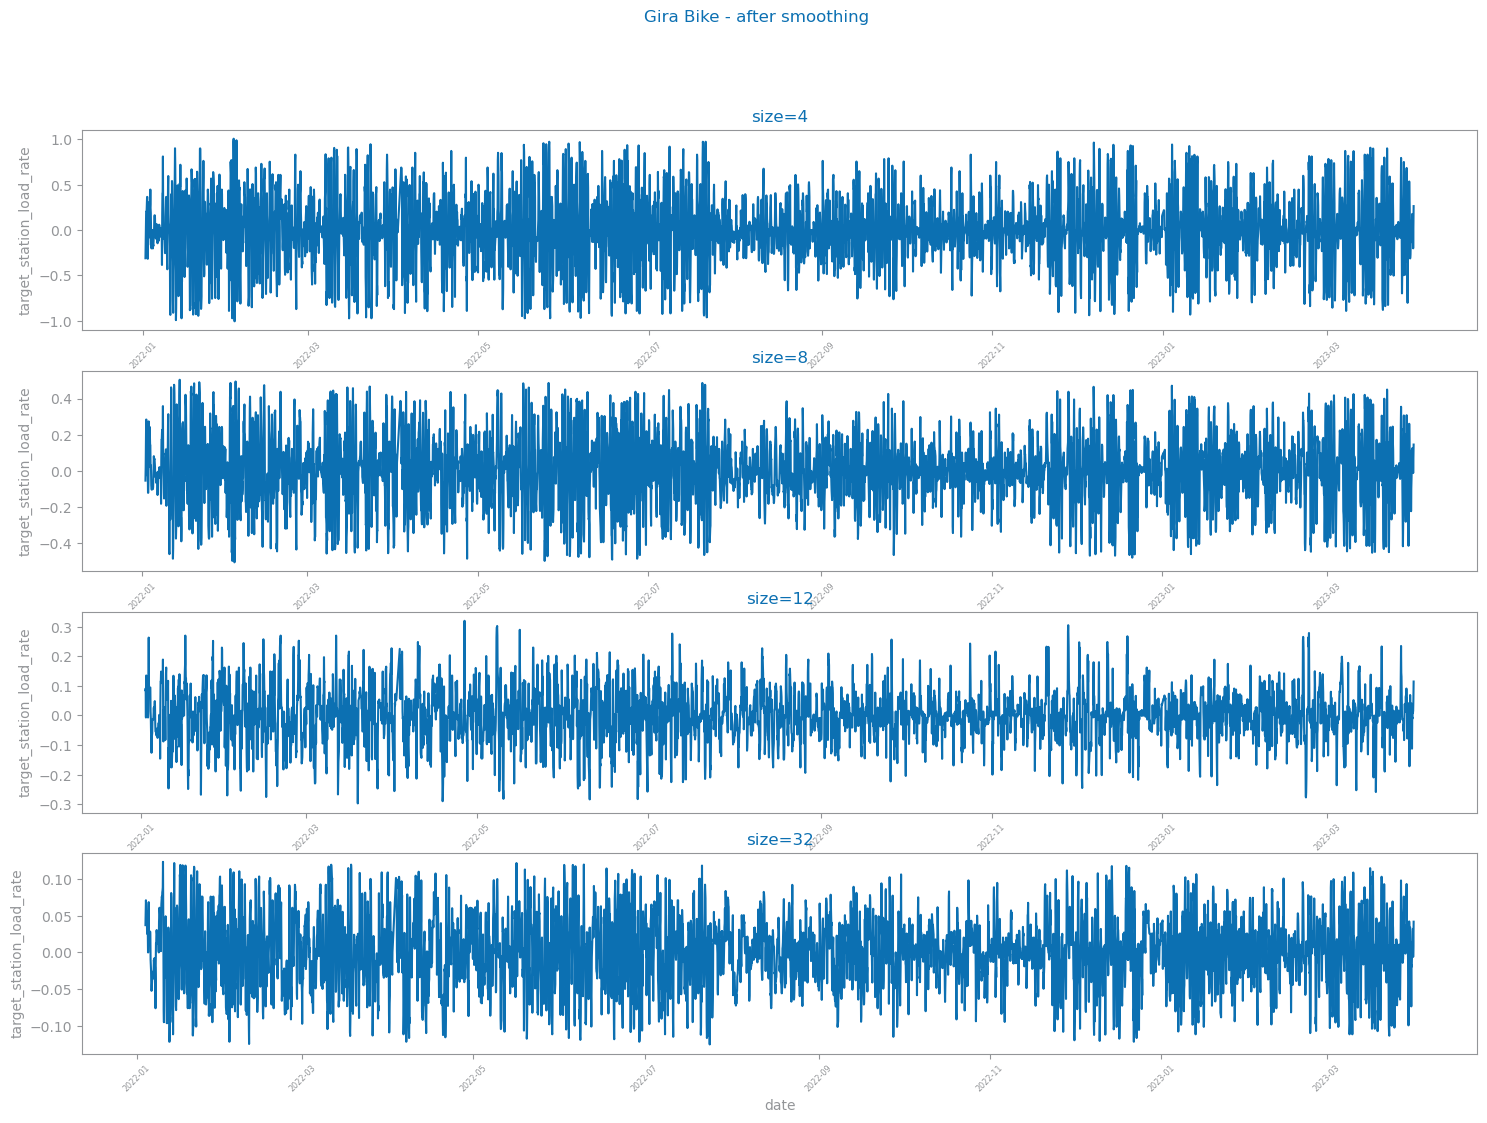

In [41]:
from matplotlib.pyplot import subplots
from matplotlib.axes import Axes
from matplotlib.figure import Figure

sizes: list[int] = [4, 8, 12, 32]
fig: Figure
axs: list[Axes]
HEIGHT = 6
fig, axs = subplots(len(sizes), 1, figsize=(3 * HEIGHT, HEIGHT / 2 * len(sizes)))
fig.suptitle(f"{file_tag} - after smoothing")

for i in range(len(sizes)):
    ss_smooth = series.rolling(window=sizes[i]).mean().dropna()
    #ss_smooth: Series = series.rolling(window=sizes[i]).mean()
    plot_line_chart(
        ss_smooth.index.to_list(),
        ss_smooth.to_list(),
        ax=axs[i],
        xlabel=ss_smooth.index.name,
        ylabel=target,
        title=f"size={sizes[i]}",
    )
show()

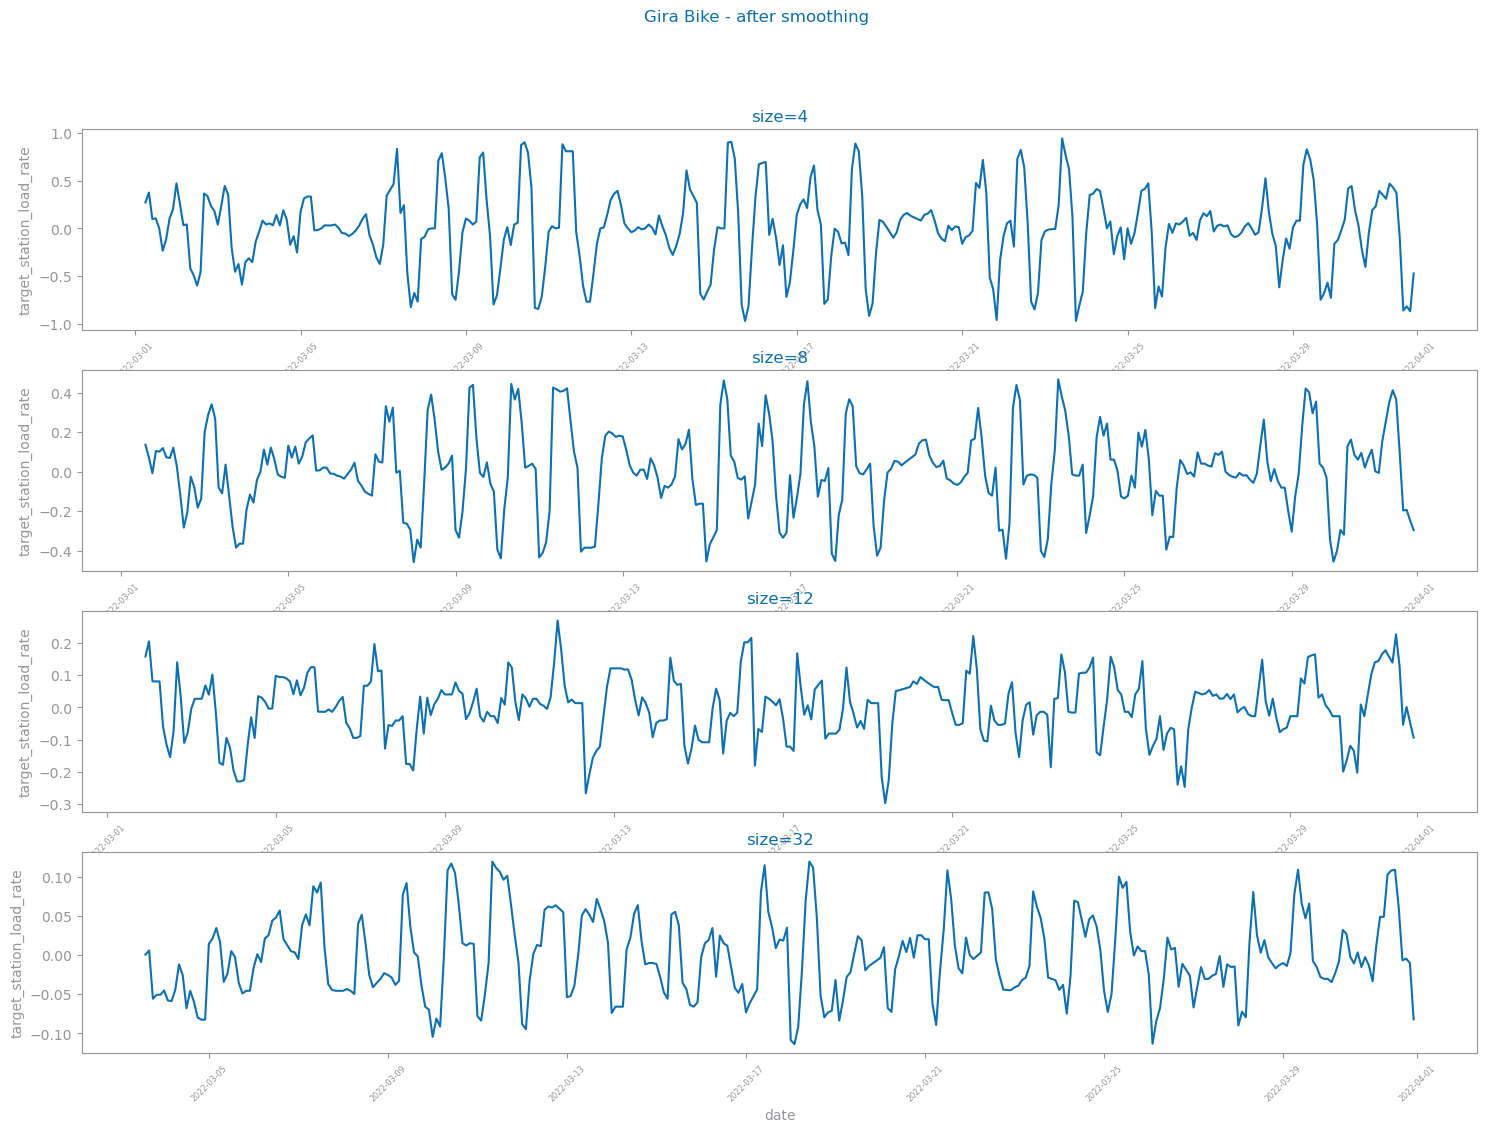

In [42]:
from matplotlib.pyplot import subplots
from matplotlib.axes import Axes
from matplotlib.figure import Figure

sizes: list[int] = [4, 8, 12, 32]
fig: Figure
axs: list[Axes]
HEIGHT = 6
fig, axs = subplots(len(sizes), 1, figsize=(3 * HEIGHT, HEIGHT / 2 * len(sizes)))
fig.suptitle(f"{file_tag} - after smoothing")

# Filtragem do período
start_date = '2022-03-01'
end_date = '2022-03-31'

# Filtrando a série para o período desejado
filtered_series = series.loc[start_date:end_date]

for i in range(len(sizes)):
    # Aplicar a suavização (rolling mean) dentro do intervalo de datas filtrado
    ss_smooth_jan = filtered_series.rolling(window=sizes[i]).mean().dropna()
    
    # Plotar o gráfico
    plot_line_chart(
        ss_smooth_jan.index.to_list(),
        ss_smooth_jan.to_list(),
        ax=axs[i],
        xlabel=ss_smooth_jan.index.name,
        ylabel=target,
        title=f"size={sizes[i]}",
    )

# Exibir os gráficos
show()


### Evaluate

dont apply to test data!!! to be done.

In [43]:
test_split_threshold=0.9

In [44]:
def apply_strategy_1(df, window_sizes):
    data_copy = df.copy()
    
    # Split the data into train and test sets
    train, test = series_train_test_split(data_copy, trn_pct=test_split_threshold)
    
    smoothed_train_dict = {}  # Dictionary to store smoothed train data for each window size
    
    # Loop through the window sizes and apply rolling mean
    for win_size in window_sizes:
        # Apply rolling mean over the training data
        train_smoothed = train.rolling(window=win_size).mean().dropna()
        
        # Store the smoothed train data in the dictionary
        smoothed_train_dict[win_size] = train_smoothed
    
    return smoothed_train_dict, test


# Define window sizes for rolling mean
#sizes = [2, 4, 8, 12, 16, 32]  # Define window sizes

# Apply the strategy
train_smoothed_dict, test_1 = apply_strategy_1(data, sizes)

# Print the smoothed data for each window size
for win_size, smoothed_data in train_smoothed_dict.items():
    print(f"Smoothed data for window size {win_size}:")
    print(smoothed_data.info())
    print()  # Empty line for better readability

print(test_1.info())  # Print the test dataset info


Smoothed data for window size 4:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4875 entries, 2022-01-01 20:00:00 to 2023-02-14 14:00:00
Data columns (total 17 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   temperature_2m                                               4875 non-null   float64
 1   rain_mm                                                      4875 non-null   float64
 2   wmo_weather_code                                             4875 non-null   float64
 3   wind_speed_10m                                               4875 non-null   float64
 4   is_holiday_lisbon                                            4875 non-null   float64
 5   is_weekend                                                   4875 non-null   float64
 6   day_of_week_sin                                              4875 non-null   float64
 7   day_of_we


### Forecasting Evaluation Metrics (Gira Bike - Linear Regression Smoothing Strategy - Window Size 4) ###
Train size: 4875
Test size: 542
RMSE - Train: 0.3502, Test: 0.7414
MAE - Train: 0.2572, Test: 0.4389
MAPE - Train: 26875278663.6117, Test: 31755409223.7580
R2 - Train: 0.0000, Test: -0.0000


### Forecasting Evaluation Metrics (Gira Bike - Linear Regression Smoothing Strategy - Window Size 8) ###
Train size: 4871
Test size: 542
RMSE - Train: 0.1806, Test: 0.7414
MAE - Train: 0.1365, Test: 0.4389
MAPE - Train: 17738065158.4919, Test: 15935446007.9457
R2 - Train: 0.0000, Test: -0.0000


### Forecasting Evaluation Metrics (Gira Bike - Linear Regression Smoothing Strategy - Window Size 12) ###
Train size: 4867
Test size: 542
RMSE - Train: 0.0841, Test: 0.7414
MAE - Train: 0.0614, Test: 0.4389
MAPE - Train: 33061763901.2920, Test: 105963367625.7048
R2 - Train: 0.0000, Test: -0.0000


### Forecasting Evaluation Metrics (Gira Bike - Linear Regression Smoothing Strategy - Window Size 32) 

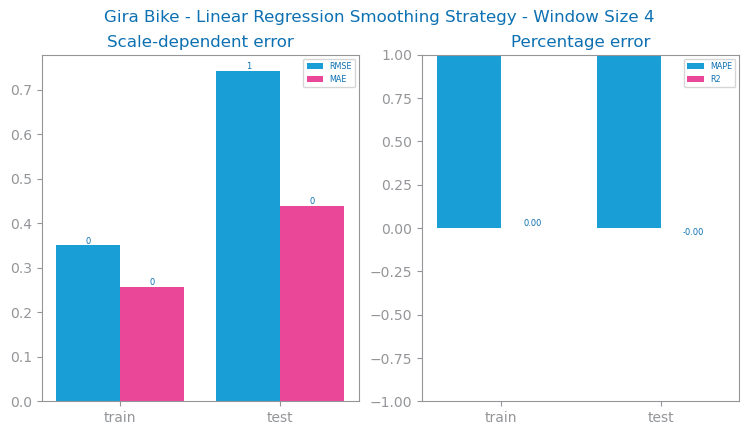

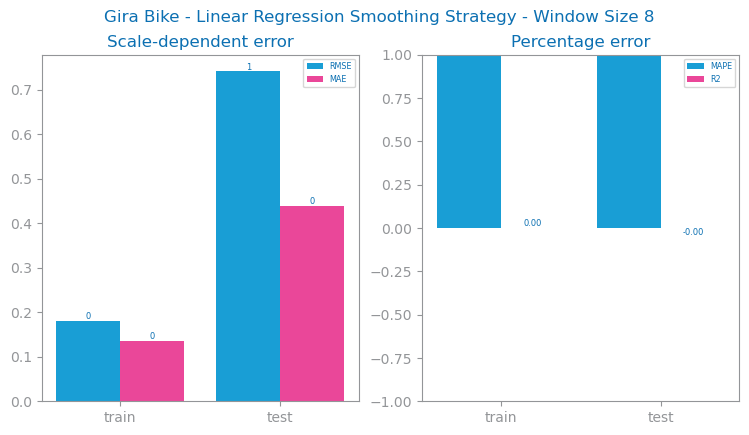

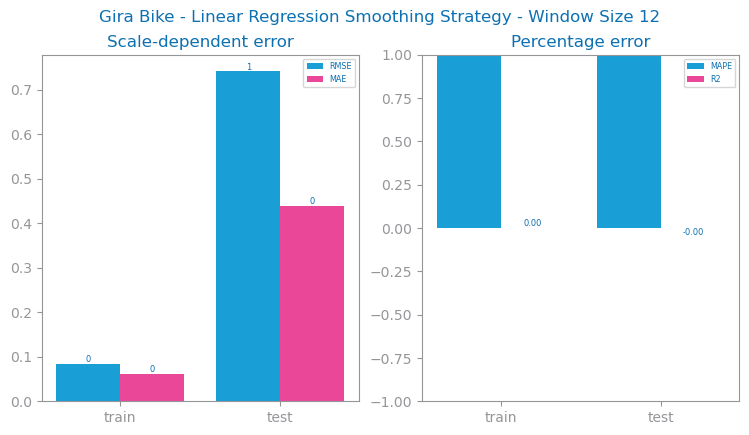

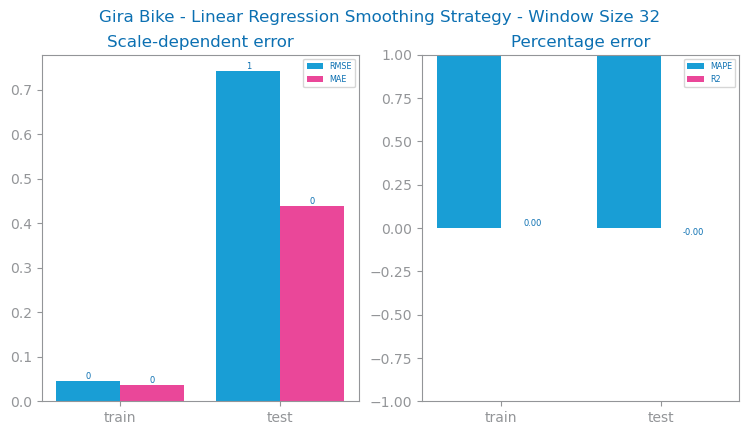

In [45]:
def apply_model_for_all_windows(smoothed_train_dict, test_1, target, file_tag):
    model = LinearRegression()
    
    # Dicionário para armazenar os resultados das previsões
    eval_results = {}

    # Iterando sobre os tamanhos das janelas
    for win_size, train_smoothed in smoothed_train_dict.items():
        # Prepare a variável dependente (target) para treino
        trnY_1 = train_smoothed[target].to_numpy()

        # Usamos a indexação temporal como feature (simulando a abordagem do código original)
        trnX_1 = arange(len(train_smoothed)).reshape(-1, 1)
        
        # Dados de teste (o índice de teste começa após o final do treino)
        tstX_1 = arange(len(train_smoothed), len(train_smoothed) + len(test_1)).reshape(-1, 1)
        tstY_1 = test_1[target].to_numpy()
        
        # Treina o modelo
        model.fit(trnX_1, trnY_1)

        # Predições para treino e teste
        prd_trn_1 = Series(model.predict(trnX_1), index=train_smoothed.index)
        prd_tst_1 = Series(model.predict(tstX_1), index=test_1.index)

        # Avaliação do modelo
        plot_forecasting_eval(train_smoothed[target], test_1[target], prd_trn_1, prd_tst_1, 
                              title=f"{file_tag} - Linear Regression Smoothing Strategy - Window Size {win_size}")

        # Armazena os resultados da avaliação
        eval_results[win_size] = {
            "train_predictions": prd_trn_1,
            "test_predictions": prd_tst_1,
        }
    
    # Salva as imagens e retornos
    return eval_results


# Exemplo de chamada da função, com o dicionário de resultados suavizados e o dataset de teste
eval_results = apply_model_for_all_windows(train_smoothed_dict, test_1, target, file_tag)

# Se desejar salvar os resultados em imagens
for win_size, results in eval_results.items():
    savefig(f"images/{file_tag}_linear_regression_eval_smoothing_win_{win_size}.png")

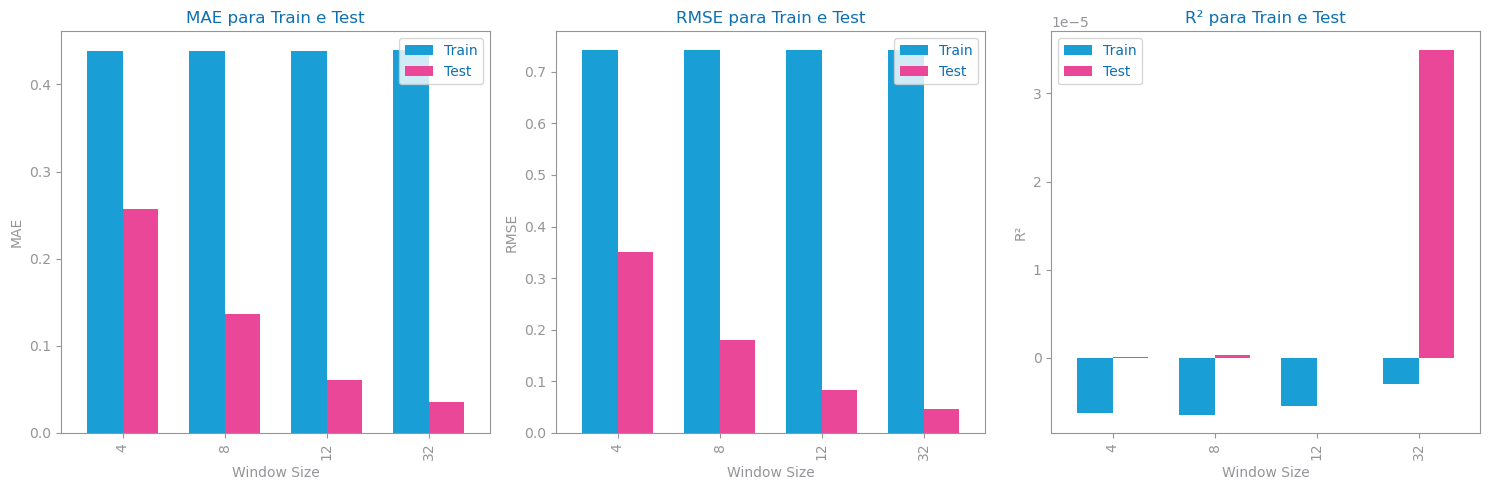

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from numpy import arange
from pandas import Series

# Função para calcular MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10  # Evita divisão por zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100


# Aplica regressão linear e calcula métricas
def evaluate_models(train_dict, test, target):
    metrics_list = []

    for win_size, train_smoothed in train_dict.items():
        trnX = arange(len(train_smoothed)).reshape(-1, 1)
        trnY = train_smoothed[target].to_numpy()
        
        tstX = arange(len(train_smoothed), len(train_smoothed) + len(test)).reshape(-1, 1)
        tstY = test[target].to_numpy()

        model = LinearRegression()
        model.fit(trnX, trnY)

        prd_trn = Series(model.predict(trnX), index=train_smoothed.index)
        prd_tst = Series(model.predict(tstX), index=test.index)

        # Calcula métricas para Train
        mae_train = mean_absolute_error(trnY, prd_trn)
        mse_train = mean_squared_error(trnY, prd_trn)
        rmse_train = mean_squared_error(trnY, prd_trn, squared=False)
        r2_train = r2_score(trnY, prd_trn)
        mape_train = mean_absolute_percentage_error(trnY, prd_trn)

        # Calcula métricas para Test
        mae_test = mean_absolute_error(tstY, prd_tst)
        mse_test = mean_squared_error(tstY, prd_tst)
        rmse_test = mean_squared_error(tstY, prd_tst, squared=False)
        r2_test = r2_score(tstY, prd_tst)
        mape_test = mean_absolute_percentage_error(tstY, prd_tst)

        metrics_list.append({
            "Window Size": win_size, "Set": "Train", "MAE": mae_train, "MSE": mse_train, "RMSE": rmse_train, "R²": r2_train, "MAPE": mape_train
        })
        metrics_list.append({
            "Window Size": win_size, "Set": "Test", "MAE": mae_test, "MSE": mse_test, "RMSE": rmse_test, "R²": r2_test, "MAPE": mape_test
        })

    metrics_df = pd.DataFrame(metrics_list)
    plot_bar_chart(metrics_df)
    return metrics_df

# Função para criar gráfico de barras agrupadas
def plot_bar_chart(df):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Três gráficos de métricas
    metrics = ["MAE", "RMSE", "R²"]

    for i, metric in enumerate(metrics):
        ax = axes[i]
        df_pivot = df.pivot(index="Window Size", columns="Set", values=metric)
        df_pivot.plot(kind="bar", ax=ax, width=0.7)

        ax.set_title(f"{metric} para Train e Test")
        ax.set_ylabel(metric)
        ax.set_xlabel("Window Size")
        ax.legend(["Train", "Test"])

    plt.tight_layout()
    plt.show()


# Aplica suavização e avalia os modelos
train_smoothed_dict, test_1 = apply_strategy_1(data, sizes)
metrics_df = evaluate_models(train_smoothed_dict, test_1, target)



### Linear Regression Plot

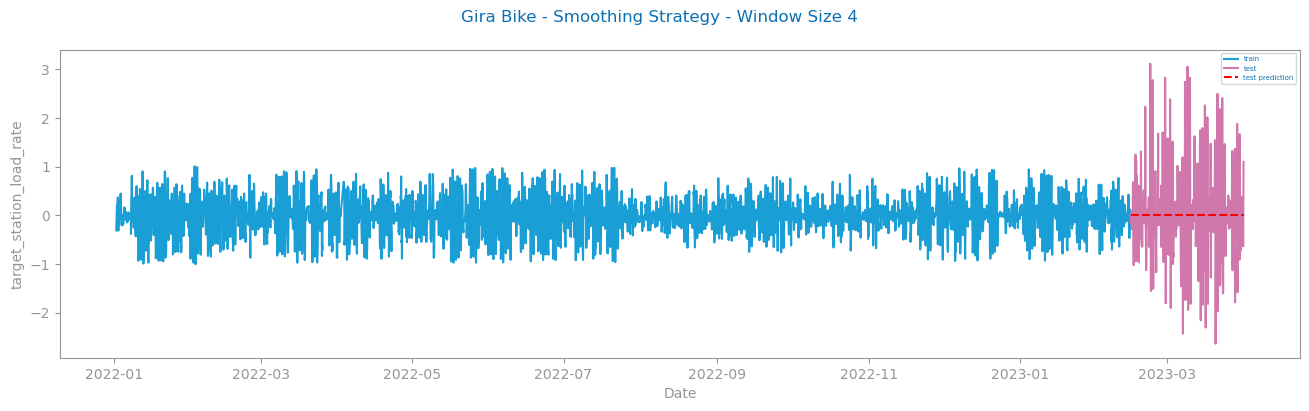

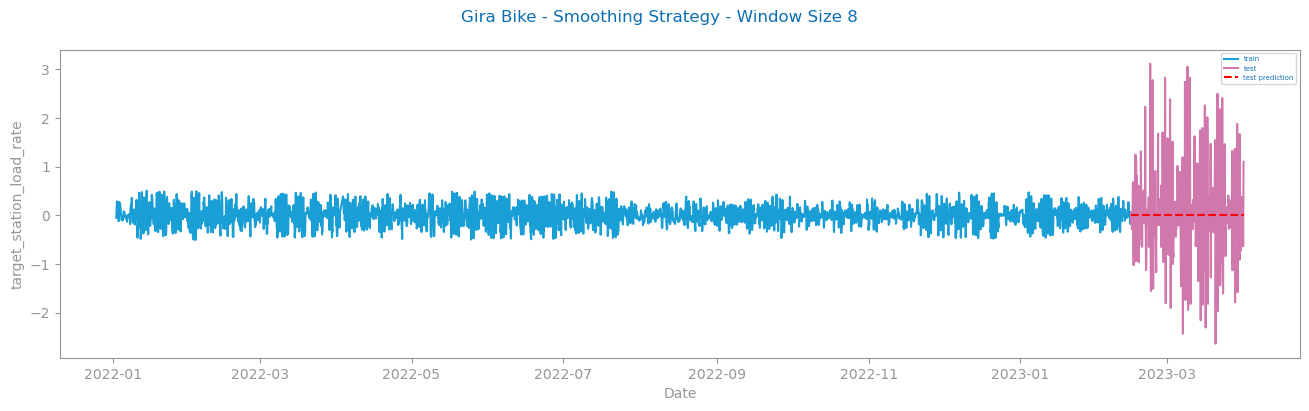

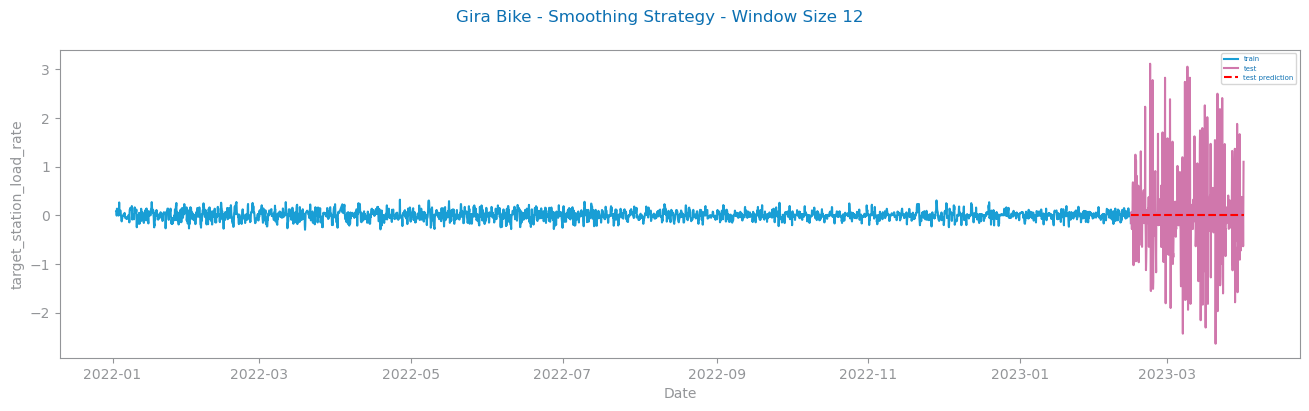

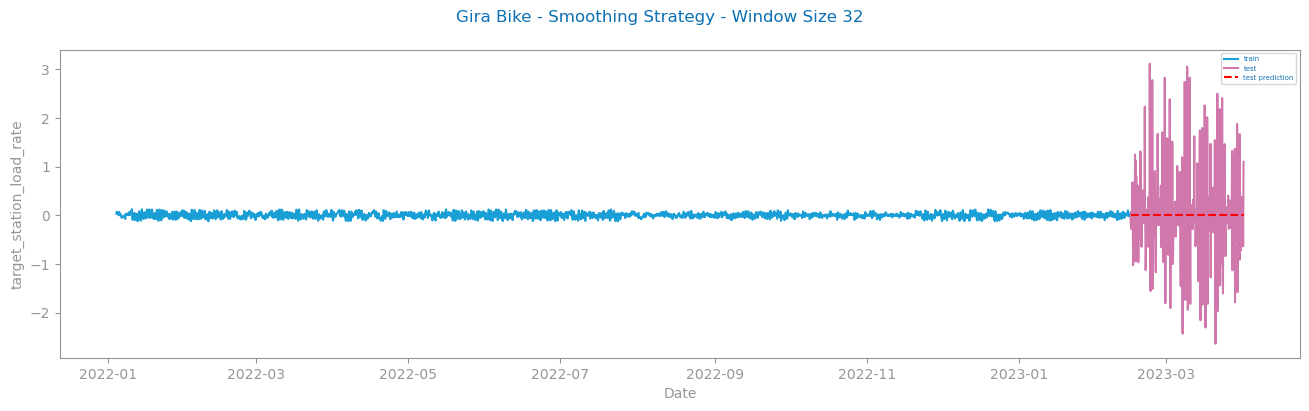

In [47]:
def apply_model_for_all_windows(smoothed_train_dict, test_1, target, file_tag):
    model = LinearRegression()
    
    # Dictionary to store evaluation results
    eval_results = {}

    # Iterate over window sizes
    for win_size, train_smoothed in smoothed_train_dict.items():
        # Prepare the dependent variable (target) for training
        trnY_1 = train_smoothed[target].to_numpy()

        # Use temporal indexing as a feature
        trnX_1 = arange(len(train_smoothed)).reshape(-1, 1)
        
        # Test data (test index starts after the end of training)
        tstX_1 = arange(len(train_smoothed), len(train_smoothed) + len(test_1)).reshape(-1, 1)
        tstY_1 = test_1[target].to_numpy()
        
        # Train the model
        model.fit(trnX_1, trnY_1)

        # Predictions for training and test
        prd_trn_1 = Series(model.predict(trnX_1), index=train_smoothed.index)
        prd_tst_1 = Series(model.predict(tstX_1), index=test_1.index)

        # Plot the forecasting series
        plot_forecasting_series(
            train_smoothed[target],
            test_1[target],
            prd_tst_1,
            title=f"{file_tag} - Smoothing Strategy - Window Size {win_size}",
            xlabel='Date',
            ylabel=target
        )

        # Save the plot for this window size
        savefig(f"images/{file_tag}_smoothing_win_{win_size}.png")

        # Store evaluation results
        eval_results[win_size] = {
            "train_predictions": prd_trn_1,
            "test_predictions": prd_tst_1,
        }
    
    return eval_results

# Example call to the function
eval_results = apply_model_for_all_windows(train_smoothed_dict, test_1, target, file_tag)

### Approach uplift comparison

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
from numpy import arange
from pandas import Series

def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10  # Small constant to avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

def calculate_metrics(smoothed_train_dict, test_1, target):
    metrics_list = []  # List to store metrics for each window size

    for win_size, train_smoothed in smoothed_train_dict.items():
        trnY_1 = train_smoothed[target].to_numpy()
        trnX_1 = arange(len(train_smoothed)).reshape(-1, 1)
        
        tstX_1 = arange(len(train_smoothed), len(train_smoothed) + len(test_1)).reshape(-1, 1)
        tstY_1 = test_1[target].to_numpy()
        
        model.fit(trnX_1, trnY_1)

        prd_tst_1 = Series(model.predict(tstX_1), index=test_1.index)

        # Calcular métricas de desempenho
        mae = mean_absolute_error(tstY_1, prd_tst_1)
        mse = mean_squared_error(tstY_1, prd_tst_1)
        rmse = mean_squared_error(tstY_1, prd_tst_1, squared=False)
        r2 = r2_score(tstY_1, prd_tst_1)
        mape = mean_absolute_percentage_error(tstY_1, prd_tst_1)

        metrics_list.append({
            "Window Size": win_size,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R²": r2,
            "MAPE": mape
        })
    
    # Criar DataFrame com métricas
    metrics_df = pd.DataFrame(metrics_list).sort_values(by="Window Size")
    display(metrics_df)
    
    return metrics_df

metrics_df = calculate_metrics(train_smoothed_dict, test_1, target)


,Window Size,MAE,MSE,RMSE,R²,MAPE
0,4,0.438892,0.549605,0.741354,-0.000006,7.051201e+06
1,8,0.438887,0.549606,0.741354,-0.000006,3.538463e+06
2,12,0.438915,0.549605,0.741354,-0.000005,2.352868e+07
3,32,0.439001,0.549604,0.741353,-0.000003,8.415411e+07


In [49]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Calcular métricas para df_0
metrics_0 = {
    "Window Size": "No Smoothing",
    "MAE": mean_absolute_error(tstY_0, prd_tst_0),
    "MSE": mean_squared_error(tstY_0, prd_tst_0),
    "RMSE": mean_squared_error(tstY_0, prd_tst_0, squared=False),
    "R²": r2_score(tstY_0, prd_tst_0),
    "MAPE": mean_absolute_percentage_error(tstY_0, prd_tst_0)
}

# Criar DataFrame
metrics_df_0 = pd.DataFrame([metrics_0])

# Mostrar tabela
display(metrics_df_0)

,Window Size,MAE,MSE,RMSE,R²,MAPE
0,No Smoothing,0.438915,0.549605,0.741353,-0.000005,1.057668e+11


## Analysis of results after Transformation

- Analysis:
    - The application of smoothing with different window sizes had practically no impact on the model's performance metrics. This is likely because the series is stationary, and it is expected that smoothing would not have a significant effect. Although smoothing also reduces noise, the series might already be smooth with very little noise, in addition to being stationary.

- How to proceed:
    - Smoothing did not improve the results of the metrics, let's stick with  df_0 (df with no smoothing).

# save to csv

In [50]:
test_data =False



if test_data==False:
    

    data_save=data.copy()

    # if no smoothing was applied, the train and test data are the same
    test_split_threshold=0.9

    data_save.reset_index(inplace=True)
    data_copy=pd.read_csv(filepath)     
    train_save, test_save = series_train_test_split(data_copy, trn_pct=test_split_threshold)


    # apply smoothing strategy
    # train_save,test_save=apply_strategy_1(data)
    # train_save.reset_index(inplace=True) # only if smoothing applied
    # test_save.reset_index(inplace=True) # only if smoothing applied

    train_save.reset_index(inplace=True)
    train_save.to_csv(f"data/df_gira_agg_2h_wtimevars_final_train.csv", index=False)
  
    
    test_save.reset_index(inplace=True)
    test_save.to_csv(f"data/df_gira_agg_2h_wtimevars_final_test.csv", index=False)
          

    print(train_save.columns)
    print(test_save.columns)

Index(['index', 'date', 'temperature_2m', 'rain_mm', 'wmo_weather_code',
       'wind_speed_10m', 'is_holiday_lisbon', 'is_weekend', 'day_of_week_sin',
       'day_of_week_cos', 'time_of_day_sin', 'time_of_day_cos',
       'target_station_status', 'target_station_load_rate',
       'station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima',
       'station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia',
       'station_load_rate_ Praça de Londres',
       'station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego',
       'station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego'],
      dtype='object')
Index(['index', 'date', 'temperature_2m', 'rain_mm', 'wmo_weather_code',
       'wind_speed_10m', 'is_holiday_lisbon', 'is_weekend', 'day_of_week_sin',
       'day_of_week_cos', 'time_of_day_sin', 'time_of_day_cos',
       'target_station_status', 'target_station_load_rate',
       'station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima',
       'station_load_rate_ Av. Rovisco

# TO DOs:

- Fechar analise de results
- Ter gráfico com os reusltados doevaluate para as diferentes windows sizenum unico gráfico
- ver plots de forecast para cada windowssizem não sei se esta bme. Os valores detrain estão bem mais baixos do que ospredicted